In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/votes/polls_questionreport.parquet'

# 데이터 불러오기
questionreport_df = pd.read_parquet(gcs_path, engine='pyarrow')
questionreport_df

,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922
...,...,...,...,...,...
51419,55763,그냥 싫어,2024-04-19 12:49:57,350,1542237
51420,55764,그냥 싫어,2024-04-19 12:50:02,3541,1542237
51421,55765,그냥 싫어,2024-04-28 06:35:38,392,984791
51422,55766,그냥 싫어,2024-04-30 04:48:25,4979,1583634


In [3]:
questionreport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51424 entries, 0 to 51423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           51424 non-null  int64         
 1   reason       51424 non-null  object        
 2   created_at   51424 non-null  datetime64[ns]
 3   question_id  51424 non-null  int64         
 4   user_id      51424 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.0+ MB


In [4]:
questionreport_df.isnull().sum()

id             0
reason         0
created_at     0
question_id    0
user_id        0
dtype: int64

In [5]:
questionreport_df.describe(include='all')

,id,reason,created_at,question_id,user_id
count,51424.000000,51424,51424,51424.000000,5.142400e+04
unique,NaN,11,NaN,NaN,NaN
top,NaN,그냥 싫어,NaN,NaN,NaN
freq,NaN,28446,NaN,NaN,NaN
mean,28027.358587,NaN,2023-05-21 22:12:41.641120768,733.099098,1.168247e+06
min,1.000000,NaN,2023-04-19 06:20:35,99.000000,8.323400e+05
25%,14020.750000,NaN,2023-05-13 01:36:21.249999872,305.000000,9.784810e+05
50%,28047.500000,NaN,2023-05-18 14:33:45,494.000000,1.160251e+06
75%,42084.250000,NaN,2023-05-26 08:45:25,1021.000000,1.351295e+06
max,55767.000000,NaN,2024-05-05 14:56:25,5110.000000,1.583634e+06


#### 신고 사유

<Axes: title={'center': '신고 사유별 빈도수'}, ylabel='reason'>

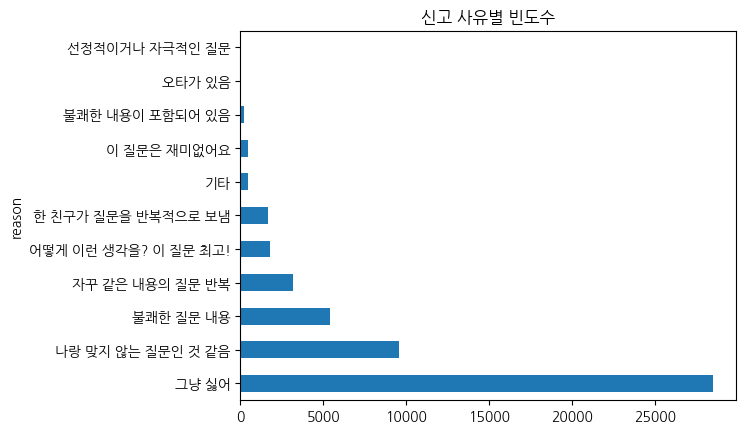

In [6]:
questionreport_df['reason'].value_counts().plot(kind='barh', title='신고 사유별 빈도수')

In [7]:
# 신고 사유별 빈도수
questionreport_df['reason'].value_counts()

reason
그냥 싫어                   28446
나랑 맞지 않는 질문인 것 같음        9541
불쾌한 질문 내용                5386
자꾸 같은 내용의 질문 반복          3202
어떻게 이런 생각을? 이 질문 최고!     1821
한 친구가 질문을 반복적으로 보냄       1701
기타                        480
이 질문은 재미없어요               471
불쾌한 내용이 포함되어 있음           250
오타가 있음                     68
선정적이거나 자극적인 질문             58
Name: count, dtype: int64

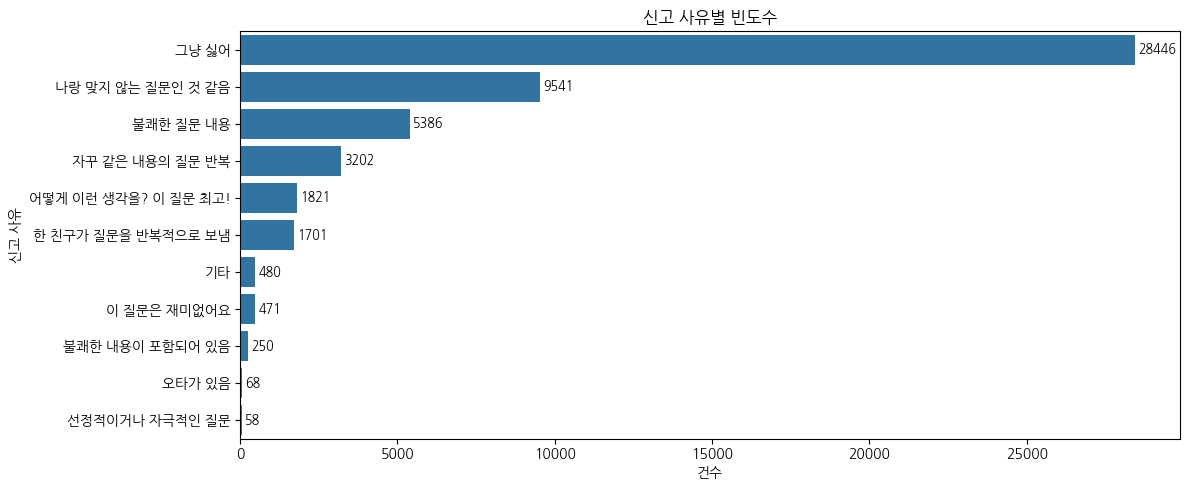

In [8]:
plt.figure(figsize=(12, 5))
sns.countplot(data=questionreport_df, y='reason', order=questionreport_df['reason'].value_counts().index)
plt.title('신고 사유별 빈도수')
plt.xlabel('건수')
plt.ylabel('신고 사유')

# 값 표시
for p in plt.gca().patches:
    plt.text(p.get_width() + 100, p.get_y() + p.get_height() / 2,
             int(p.get_width()), va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [9]:
# 신고 사유 고유값 목록 확인
questionreport_df['reason'].unique()

array(['이 질문은 재미없어요', '불쾌한 내용이 포함되어 있음', '어떻게 이런 생각을? 이 질문 최고!', '기타',
       '선정적이거나 자극적인 질문', '오타가 있음', '한 친구가 질문을 반복적으로 보냄',
       '나랑 맞지 않는 질문인 것 같음', '그냥 싫어', '불쾌한 질문 내용', '자꾸 같은 내용의 질문 반복'],
      dtype=object)

In [10]:
# 신고 사유별 건수 및 전체 대비 비율 계산
reason_counts = questionreport_df['reason'].value_counts()
reason_ratio = (reason_counts / reason_counts.sum()) * 100

# 데이터프레임으로 정리
reason_stats_df = pd.DataFrame({
    'count': reason_counts,
    'ratio(%)': reason_ratio.round(2)
}).reset_index().rename(columns={'index': 'reason'})

# 출력
import pandas as pd
pd.set_option('display.max_rows', None)  # 모든 행 출력

reason_stats_df

,reason,count,ratio(%)
0,그냥 싫어,28446,55.32
1,나랑 맞지 않는 질문인 것 같음,9541,18.55
2,불쾌한 질문 내용,5386,10.47
3,자꾸 같은 내용의 질문 반복,3202,6.23
4,어떻게 이런 생각을? 이 질문 최고!,1821,3.54
5,한 친구가 질문을 반복적으로 보냄,1701,3.31
6,기타,480,0.93
7,이 질문은 재미없어요,471,0.92
8,불쾌한 내용이 포함되어 있음,250,0.49
9,오타가 있음,68,0.13


In [11]:
# 유저별 신고 사유 건수 피벗 테이블
user_reason_df = questionreport_df.pivot_table(index='user_id', columns='reason', aggfunc='size', fill_value=0)

# 일부 미리보기
user_reason_df.head()

reason,그냥 싫어,기타,나랑 맞지 않는 질문인 것 같음,불쾌한 내용이 포함되어 있음,불쾌한 질문 내용,선정적이거나 자극적인 질문,어떻게 이런 생각을? 이 질문 최고!,오타가 있음,이 질문은 재미없어요,자꾸 같은 내용의 질문 반복,한 친구가 질문을 반복적으로 보냄
user_id,,,,,,,,,,,
832340,0,1,0,0,0,0,1,0,0,0,0
833422,0,0,0,0,0,0,1,0,0,0,0
833626,0,1,0,0,0,0,10,0,0,0,0
833714,0,2,0,0,0,0,1,0,1,0,0
835057,16,0,0,0,0,0,0,0,0,1,0


In [13]:
# '그냥 싫어'만 10번 이상 신고한 유저
just_hate_users = user_reason_df[(user_reason_df['그냥 싫어'] >= 10) & (user_reason_df.drop(columns='그냥 싫어').sum(axis=1) == 0)]
print(f"'그냥 싫어'만 10회 이상 신고한 유저 수: {len(just_hate_users)}")
just_hate_users.head()

'그냥 싫어'만 10회 이상 신고한 유저 수: 156


reason,그냥 싫어,기타,나랑 맞지 않는 질문인 것 같음,불쾌한 내용이 포함되어 있음,불쾌한 질문 내용,선정적이거나 자극적인 질문,어떻게 이런 생각을? 이 질문 최고!,오타가 있음,이 질문은 재미없어요,자꾸 같은 내용의 질문 반복,한 친구가 질문을 반복적으로 보냄
user_id,,,,,,,,,,,
840253,22,0,0,0,0,0,0,0,0,0,0
841795,10,0,0,0,0,0,0,0,0,0,0
849685,11,0,0,0,0,0,0,0,0,0,0
878920,11,0,0,0,0,0,0,0,0,0,0
889861,15,0,0,0,0,0,0,0,0,0,0


#### 왜 칭찬을 신고해?

In [17]:
# 해당 사유로 10번 이상 신고한 유저 필터링
target_reason = "어떻게 이런 생각을? 이 질문 최고!"

# 신고 사유가 해당 문구인 것만 필터링
filtered_df = questionreport_df[questionreport_df['reason'] == target_reason]

# 유저별 신고 횟수 계산
user_counts = filtered_df['user_id'].value_counts()

# 10회 이상 신고한 유저만 추출
top_users = user_counts[user_counts >= 10]

# 결과 출력
print(f"'{target_reason}' 사유로 10회 이상 신고한 유저 수: {len(top_users)}")
top_users_df = top_users.reset_index()
top_users_df.columns = ['user_id', 'count']
top_users_df

'어떻게 이런 생각을? 이 질문 최고!' 사유로 10회 이상 신고한 유저 수: 14


,user_id,count
0,841181,32
1,865339,22
2,850747,21
3,864160,18
4,848877,17
5,854607,16
6,839369,13
7,860503,13
8,871126,12
9,843650,12


In [18]:
# 위 14명의 유저가 신고한 질문들 중 일부 확인
suspicious_users = top_users_df['user_id'].tolist()
questionreport_df[
    (questionreport_df['user_id'].isin(suspicious_users)) &
    (questionreport_df['reason'] == "어떻게 이런 생각을? 이 질문 최고!")
][['user_id', 'question_id', 'created_at']].head(10)

,user_id,question_id,created_at
65,839369,197,2023-04-20 15:27:14
74,839369,137,2023-04-20 22:28:45
75,839369,107,2023-04-20 22:29:53
76,839369,107,2023-04-20 22:40:46
81,839369,145,2023-04-21 00:24:51
82,839369,226,2023-04-21 00:24:55
83,839369,115,2023-04-21 00:24:59
115,839369,239,2023-04-21 12:06:32
120,839369,107,2023-04-21 13:05:13
168,839369,126,2023-04-22 04:41:38


- 단기간에 집중 신고
   - 4월 20일~22일 사이에 신고가 몰려 있음
   - 비정상적 반복 행동으로 보일 수 있음

In [19]:
questionreport_df[questionreport_df['user_id'] == 839369]['reason'].value_counts()

reason
어떻게 이런 생각을? 이 질문 최고!    13
기타                       1
이 질문은 재미없어요              1
그냥 싫어                    1
Name: count, dtype: int64

In [20]:
questionreport_df[questionreport_df['user_id'] == 841181]['reason'].value_counts()

reason
어떻게 이런 생각을? 이 질문 최고!    32
Name: count, dtype: int64

In [39]:
questionreport_df[questionreport_df['user_id'] == 841181]['question_id'].value_counts()

question_id
235    2
233    2
319    2
159    1
123    1
209    1
301    1
242    1
182    1
231    1
255    1
121    1
318    1
156    1
286    1
202    1
228    1
201    1
245    1
103    1
262    1
168    1
249    1
293    1
127    1
155    1
157    1
321    1
146    1
Name: count, dtype: int64

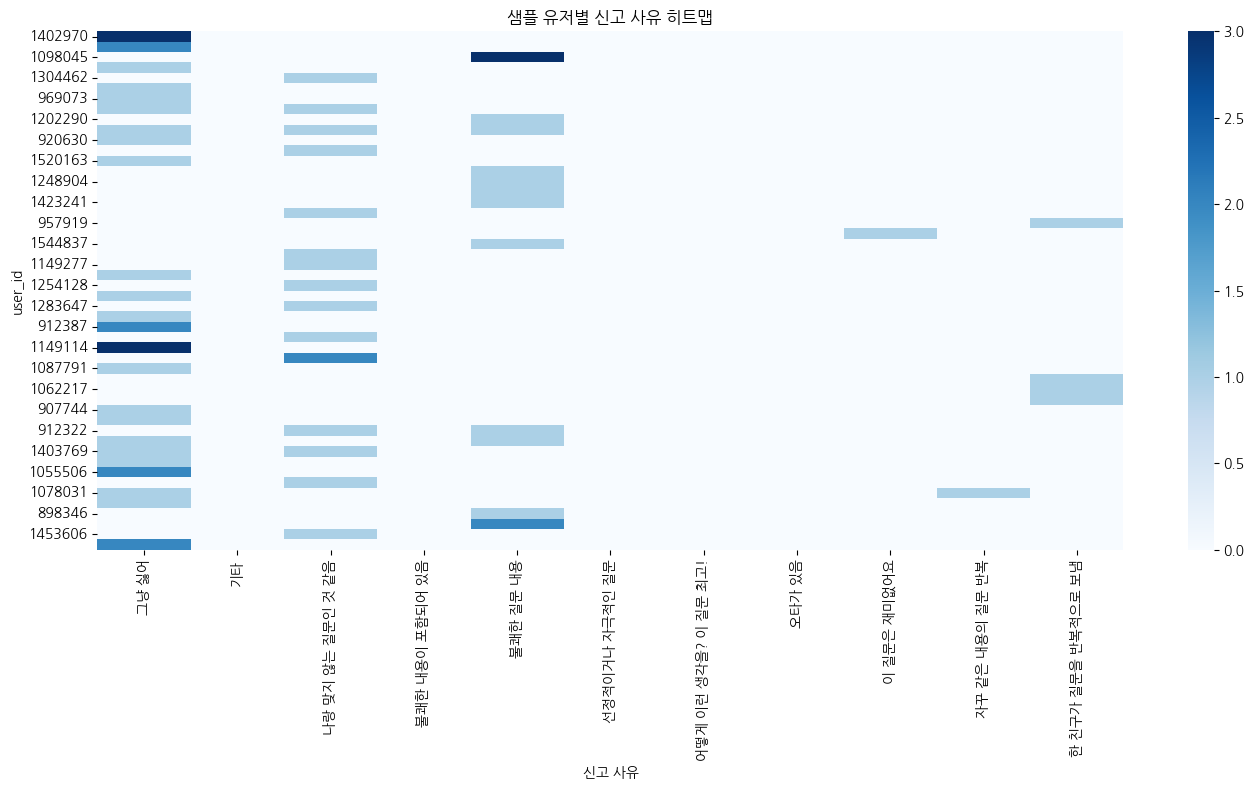

In [16]:

plt.figure(figsize=(14, 8))
sns.heatmap(user_reason_df.sample(50), cmap='Blues', cbar=True)
plt.title('샘플 유저별 신고 사유 히트맵')
plt.xlabel('신고 사유')
plt.ylabel('user_id')
plt.tight_layout()
plt.show()


#### 신고된 질문 중복 여부 확인

In [11]:
duplicate_reports = questionreport_df['question_id'].duplicated().sum()

duplicate_reports

48289

- 총 51,424건 중 약 94%가 기존에 신고된 질문에 대한 중복 신고

#### 시간대 분포

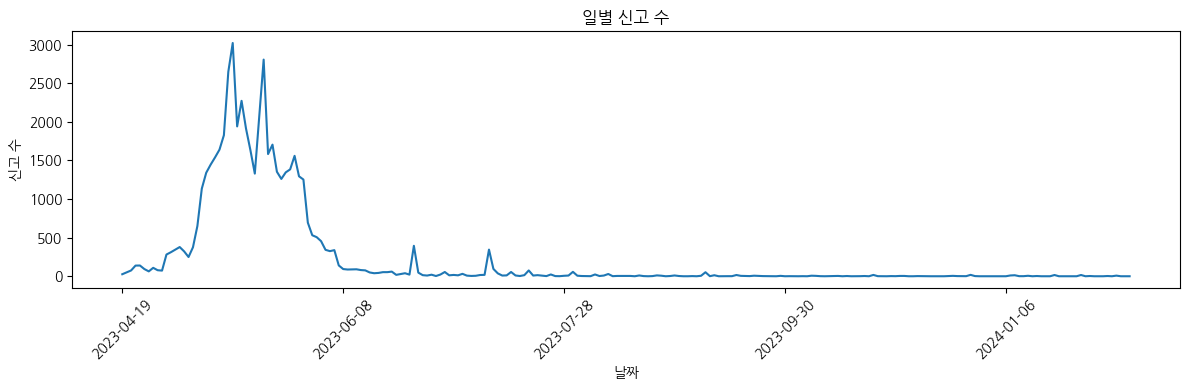

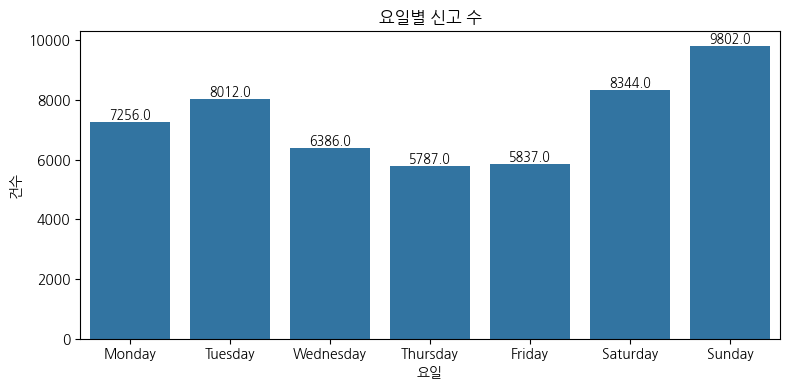

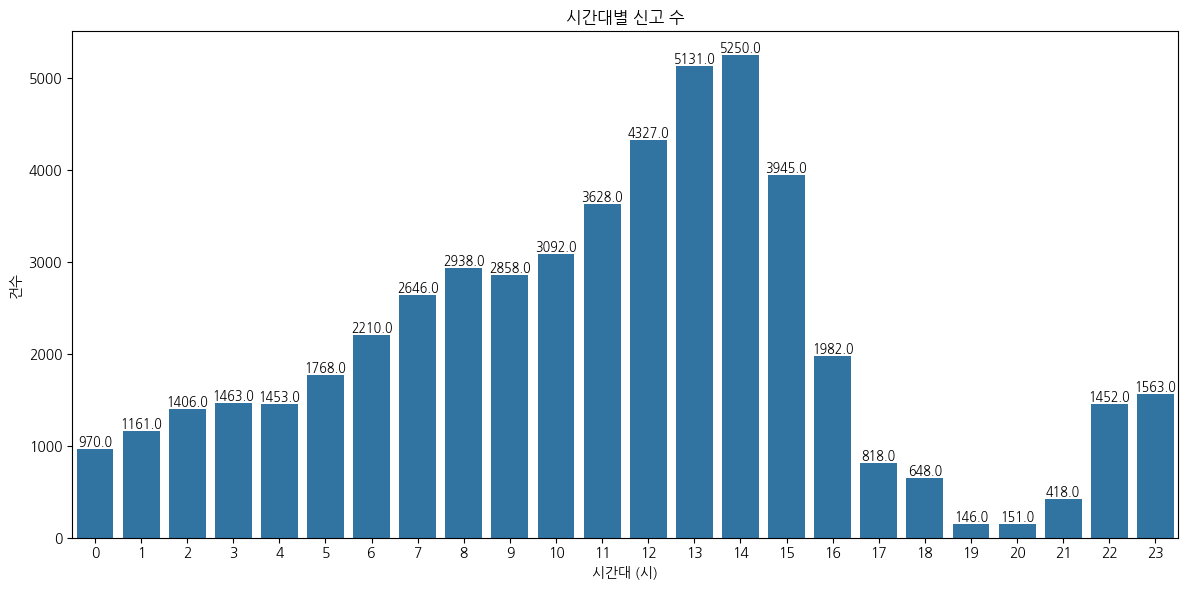

In [20]:

# 날짜 파생 변수 생성
questionreport_df['date'] = questionreport_df['created_at'].dt.date.astype(str)
questionreport_df['hour'] = questionreport_df['created_at'].dt.hour.astype(int)
questionreport_df['weekday'] = questionreport_df['created_at'].dt.day_name()

# 1. 일자별 신고 수
plt.figure(figsize=(12, 4))
questionreport_df['date'].value_counts().sort_index().plot(kind='line', title='일별 신고 수')
plt.xlabel('날짜')
plt.ylabel('신고 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. 요일별 신고 수
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=questionreport_df, x='weekday',
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('요일별 신고 수')
plt.xlabel('요일')
plt.ylabel('건수')

# 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# 3. 시간대별 신고 수
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=questionreport_df, x='hour')
plt.title('시간대별 신고 수')
plt.xlabel('시간대 (시)')
plt.ylabel('건수')

# 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



1. 일별 신고 수 추이
- 2023년 4월 말 ~ 6월 초 사이에 폭발적인 신고 증가가 있었고, 이후 급격히 감소
- 신고 기능 변경 또는 서비스 변화(유저 수 감소 등) 시점일 가능성
                         
2. 요일별 신고 수
- 주말(토/일)에 신고가 가장 많음, 특히 일요일이 가장 많음 (9,802건)
- 평일 중엔 화요일(8,012건)이 상대적으로 높음
                        
3. 시간대별 신고 수
- 13시~14시 사이에 신고가 정점 (5,250건)
- 정오오후 3시 사이(11시15시)가 가장 활발한 신고 시간대
- 새벽오전(07시)는 비교적 낮고, 18시 이후 급감
- 점심시간 전후로 활동이 많음

#### 유저별 신고 패턴

user_id
1441146    865
1330073    271
892516     254
1518143    167
1035498    159
1316535    152
1006953    151
1377605    140
1382117    129
962059     118
Name: count, dtype: int64

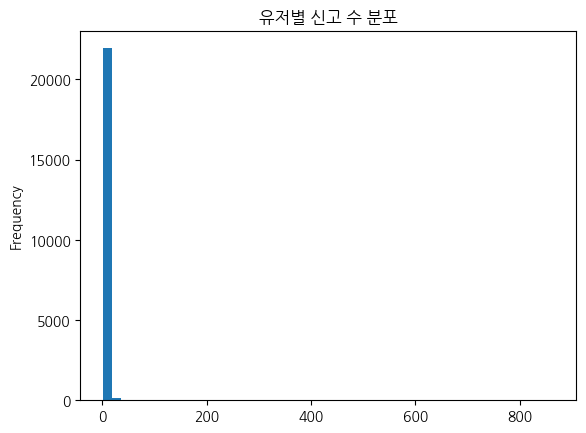

In [13]:
top_users = questionreport_df['user_id'].value_counts().head(10)
questionreport_df['user_id'].value_counts().plot(kind='hist', bins=50, title='유저별 신고 수 분포')

top_users

1. 악성 유저 혹은 신고 매크로 가능성
- 극소수의 유저가 수백 건의 신고를 집중적으로 제출
- 865건 신고한 유저는 전체 신고의 약 1.7% 이상을 혼자 처리

In [27]:
top_users = [1441146, 1330073, 892516]  # 상위 유저
questionreport_df[questionreport_df['user_id'].isin(top_users)]['reason'].value_counts()

reason
그냥 싫어                 1125
나랑 맞지 않는 질문인 것 같음      236
자꾸 같은 내용의 질문 반복         16
한 친구가 질문을 반복적으로 보냄      10
불쾌한 질문 내용                3
Name: count, dtype: int64

In [24]:
questionreport_df[questionreport_df['user_id'] == 1441146]['reason'].value_counts().head(10)

reason
그냥 싫어    865
Name: count, dtype: int64

In [28]:
questionreport_df[questionreport_df['user_id'] == 1330073]['reason'].value_counts().head(10)

reason
나랑 맞지 않는 질문인 것 같음     220
그냥 싫어                  30
자꾸 같은 내용의 질문 반복        13
한 친구가 질문을 반복적으로 보냄      7
불쾌한 질문 내용               1
Name: count, dtype: int64

In [26]:
questionreport_df[questionreport_df['user_id'] == 892516]['reason'].value_counts().head(10)

reason
그냥 싫어                 230
나랑 맞지 않는 질문인 것 같음      16
한 친구가 질문을 반복적으로 보냄      3
자꾸 같은 내용의 질문 반복         3
불쾌한 질문 내용               2
Name: count, dtype: int64

#### 질문별 신고 누적 건수

In [15]:
top_questions = questionreport_df['question_id'].value_counts().head(10)
top_questions

question_id
111    988
410    803
398    660
424    533
305    493
564    338
144    307
519    283
494    258
479    239
Name: count, dtype: int64

In [32]:
questionreport_df[questionreport_df['question_id'] == 111]['reason'].value_counts().head(10)


reason
그냥 싫어                   517
불쾌한 질문 내용               227
나랑 맞지 않는 질문인 것 같음        84
불쾌한 내용이 포함되어 있음          55
이 질문은 재미없어요              37
자꾸 같은 내용의 질문 반복          35
기타                       16
한 친구가 질문을 반복적으로 보냄       11
어떻게 이런 생각을? 이 질문 최고!      3
오타가 있음                    2
Name: count, dtype: int64

In [33]:
questionreport_df[questionreport_df['question_id'] == 410]['reason'].value_counts().head(10)

reason
그냥 싫어                   383
불쾌한 질문 내용               284
나랑 맞지 않는 질문인 것 같음        89
자꾸 같은 내용의 질문 반복          26
한 친구가 질문을 반복적으로 보냄        7
불쾌한 내용이 포함되어 있음           5
이 질문은 재미없어요               4
어떻게 이런 생각을? 이 질문 최고!      4
기타                        1
Name: count, dtype: int64

#### 신고 사유와 특정 유저/질문의 연관성 탐색

In [16]:
pd.crosstab(questionreport_df['reason'], questionreport_df['user_id'])
pd.crosstab(questionreport_df['reason'], questionreport_df['question_id'])

question_id,99,100,101,102,103,104,105,106,107,108,...,5041,5049,5050,5070,5073,5093,5094,5102,5107,5110
reason,,,,,,,,,,,,,,,,,,,,,
그냥 싫어,14,16,36,37,21,14,28,25,15,56,...,1,1,1,1,0,1,1,1,1,0
기타,1,0,1,2,0,0,0,2,5,6,...,0,0,0,0,0,0,0,0,0,0
나랑 맞지 않는 질문인 것 같음,2,4,13,12,1,3,6,8,7,19,...,0,0,0,0,1,0,0,0,0,0
불쾌한 내용이 포함되어 있음,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
불쾌한 질문 내용,0,4,2,11,4,6,5,2,6,52,...,0,0,0,0,0,0,0,0,0,2
선정적이거나 자극적인 질문,0,0,0,0,0,0,0,0,0,11,...,0,0,0,0,0,0,0,0,0,0
어떻게 이런 생각을? 이 질문 최고!,10,4,5,9,10,7,11,6,19,7,...,0,0,0,0,0,0,0,0,0,0
오타가 있음,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
이 질문은 재미없어요,4,1,1,4,1,1,0,1,1,9,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# '불쾌한 질문 내용'으로 가장 많이 신고된 질문 Top 3
questionreport_df[questionreport_df['reason'] == '불쾌한 질문 내용'] \
    ['question_id'].value_counts().head(3)

question_id
410    284
111    227
398    199
Name: count, dtype: int64

In [36]:
# 111번 질문을 신고한 유저 목록 (중복 제거)
reported_users_111 = questionreport_df[questionreport_df['question_id'] == 111]['user_id'].unique()

# 결과 확인
print(f"총 {len(reported_users_111)}명의 유저가 111번 질문을 신고함")
print(reported_users_111)

총 753명의 유저가 111번 질문을 신고함
[ 838342  837797  838743  839245  838146  837587  842372  840301  844851
  844489  842742  839092  839817  841437  847253  846505  847004  846735
  849596  849342  839884  843946  846936  851717  849408  852700  851645
  854079  847651  845626  842788  853350  853650  857062  859901  845539
  858179  855889  859286  863304  852646  860295  862649  859660  853671
  858174  862060  850231  864502  862676  859555  861418  867672  861981
  863122  868223  851115  863523  847149  861214  861575  858922  844868
  872430  872240  855433  866359  874293  862680  874954  848732  879168
  855295  859038  877947  847788  875786  867236  875203  865066  840406
  857629  839417  894541  892402  848095  892686  887737  899824  881045
  849728  897630  886898  889501  900666  853516  871957  910386  905121
  904064  898524  914010  886476  860090  910851  912387  921892  909592
  897512  928853  852098  894226  884403  893521  845630  867700  897378
  906567  897857  897362  

In [37]:
questionreport_df[
    questionreport_df['question_id'] == 111
][['user_id', 'created_at', 'reason']].sort_values(by='created_at')


,user_id,created_at,reason
27,838342,2023-04-20 00:48:54,불쾌한 내용이 포함되어 있음
39,837797,2023-04-20 09:16:22,이 질문은 재미없어요
41,838743,2023-04-20 10:47:43,불쾌한 내용이 포함되어 있음
78,839245,2023-04-21 00:14:54,불쾌한 내용이 포함되어 있음
79,839245,2023-04-21 00:14:58,기타
163,838146,2023-04-22 03:46:08,불쾌한 내용이 포함되어 있음
164,838146,2023-04-22 03:46:11,이 질문은 재미없어요
314,837587,2023-04-23 06:02:19,어떻게 이런 생각을? 이 질문 최고!
321,838743,2023-04-23 07:44:11,불쾌한 내용이 포함되어 있음
322,838743,2023-04-23 07:44:17,불쾌한 내용이 포함되어 있음
